# [o3]- Proyecto Ozono - Visualizacion_Mapa_Madrid- v0

In [16]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [17]:
madrid = "/home/rulicering/Aux_Proyecto_Ozono/madrid.geojson"
map_data = gpd.read_file(madrid)
map_data.head(5)

,nombre,coddistrit,shape_area,shape_len,cartodb_id,created_at,updated_at,geometry
0,Fuencarral - El Pardo,8,2.378101e+08,94525.156286,8,2015-07-06T13:59:20,2015-07-06T13:59:20,"MULTIPOLYGON (((-3.65282 40.64274, -3.65259 40..."
1,Moncloa - Aravaca,9,4.653110e+07,41015.598541,9,2015-07-06T13:59:20,2015-07-06T13:59:20,"MULTIPOLYGON (((-3.80104 40.46945, -3.80018 40..."
2,Villa de Vallecas,18,5.141792e+07,33553.533744,18,2015-07-06T13:59:20,2015-07-06T13:59:20,"MULTIPOLYGON (((-3.60761 40.38702, -3.60655 40..."
3,Vicálvaro,19,3.519385e+07,34157.734501,19,2015-07-06T13:59:20,2015-07-06T13:59:20,"MULTIPOLYGON (((-3.57764 40.41366, -3.57290 40..."
4,Barajas,21,4.190856e+07,28708.623102,21,2015-07-06T13:59:20,2015-07-06T13:59:20,"MULTIPOLYGON (((-3.56175 40.51116, -3.56167 40..."


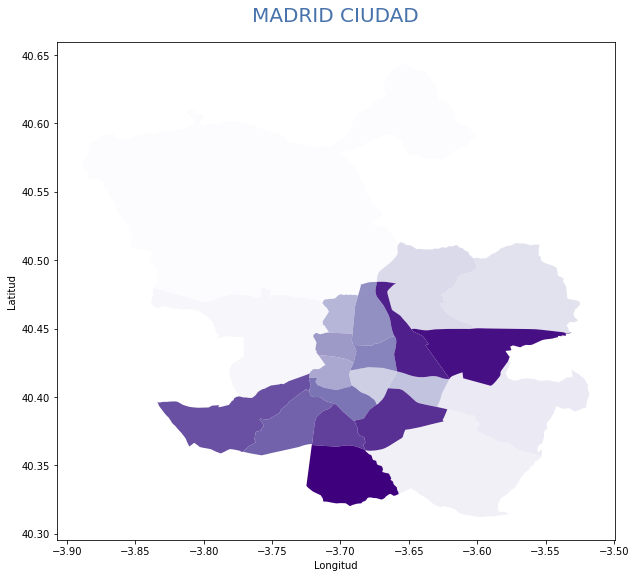

In [18]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('MADRID CIUDAD', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
 
# Mostrar el mapa finalizado
#map_data.plot(column='MAD', cmap='plasma', ax=ax, zorder=5)
#map_data.plot(column = 'coddistrit',cmap='plasma', ax=ax, zorder=5)
map_data.plot(cmap='Purples', ax=ax, zorder=5)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import basemap as bm

In [9]:
#https://pybonacci.org/2014/10/07/basemap-y-google-geocode-para-representar-puntos-sobre-un-mapa/

In [2]:
_GEOCODE_QUERY_URL = 'http://maps.googleapis.com/maps/api/geocode/json'
 
def geocode(address, sensor='false'):
    """
    Given a string 'address', return a dictionary of information about
    that location, including its latitude and longitude.
    """
    params = dict(address=address, sensor=sensor)
    response = requests.get(url=_GEOCODE_QUERY_URL, params=params)
    return response.json()
 
def address_to_latlng(address):
    """
    Given a string 'address', return a '(latitude, longitude)' pair.
    """
    location = geocode(address)['results'][0]['geometry']['location']
    return tuple(location.values())

In [10]:
def mapa_europa(ax = None):
    m = bm.Basemap(width=4000000,height=4000000, resolution='l',projection='aea',lat_1=40.,lat_2=60,lon_0=10,lat_0=50)
    m.drawparallels(np.arange(-90.,91.,10.))
    m.drawmeridians(np.arange(-180.,181.,10.))
    m.shadedrelief(scale=0.5)
    m.drawcoastlines()
    m.drawcountries()
    m.fillcontinents(color='coral', alpha=0.3)
    return m

In [48]:
#40.416627, -3.703927
def mapa_madrid():
    m = bm.Basemap(width=1000000,height=1000000,
                   resolution='l',projection='eck4',
                   lat_0=40.41,lon_0=-3.70)
    m.drawparallels(np.arange(-90.,91.,10.))
    m.drawmeridians(np.arange(-180.,181.,10.))
    m.shadedrelief(scale=0.5)
    m.drawcoastlines()
    m.drawcountries()
    m.fillcontinents(color='coral', alpha=0.3)
    return m

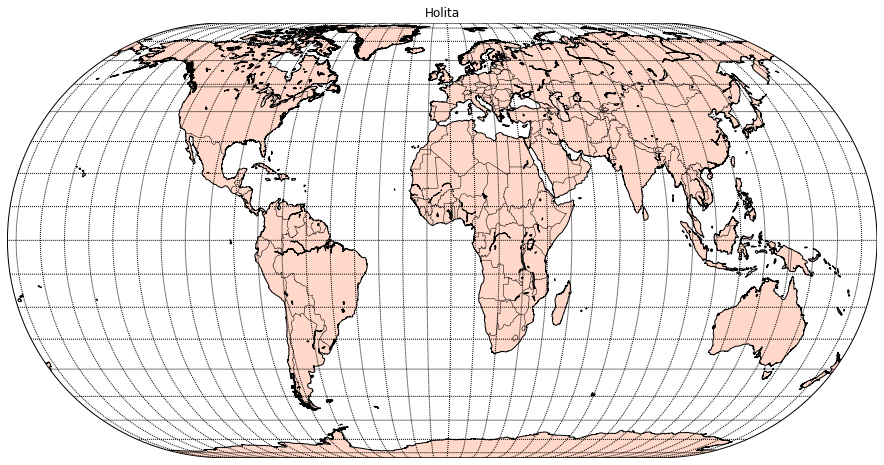

In [49]:
f, ax = plt.subplots(figsize=(20, 8))
ax.set_title('Holita')
m = mapa_madrid()
#f.savefig('holi.png', dpi=72, transparent=False, bbox_inches='tight')
f.savefig('holi.png', dpi=72, transparent=False, bbox_inches='tight')